<a href="https://colab.research.google.com/github/cg3731/deeplearing_project/blob/main/%EC%96%BC%EA%B5%B4%EC%9D%B8%EC%8B%9D_%ED%85%8C%EC%8A%A4%ED%8A%B8_API_model_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 얼굴인식 모델 상용 모델 테스트 및 자체 API 

In [ ]:
!pip install deepface

In [30]:
from deepface import DeepFace
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]




df = DeepFace.find(img_path="/content/drive/MyDrive/Colab Notebooks/vision_project/faceID/only_face/F0003_D_14_Seoul_c1.jpg", 
                   db_path="/content/drive/MyDrive/Colab Notebooks/vision_project/faceID/only_face/",
                   model_name = models[1],
                   enforce_detection=False)

print(df)

# DeepFace.find => face recognition을 위한 함수 

facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:01<00:00, 47.7MB/s]


1/1 [==============================] - 0s 33ms/step
Representations stored in  /content/drive/MyDrive/Colab Notebooks/vision_project/faceID/only_face/ / representations_facenet.pkl  file. Please delete this file when you add new identities in your database.
1/1 [==============================] - 0s 33ms/step
find function lasts  28.134759426116943  seconds
                                             identity  Facenet_cosine
0   /content/drive/MyDrive/Colab Notebooks/vision_...        0.000000
1   /content/drive/MyDrive/Colab Notebooks/vision_...        0.232783
2   /content/drive/MyDrive/Colab Notebooks/vision_...        0.232798
3   /content/drive/MyDrive/Colab Notebooks/vision_...        0.234698
4   /content/drive/MyDrive/Colab Notebooks/vision_...        0.251478
5   /content/drive/MyDrive/Colab Notebooks/vision_...        0.252562
6   /content/drive/MyDrive/Colab Notebooks/vision_...        0.263017
7   /content/drive/MyDrive/Colab Notebooks/vision_...        0.263075
8   /conten

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


41
F0003_D_14_Seoul
F0003_D_14_Seoul
F0003_D_14_Seoul
F0003_M_39_Seoul
F0003_M_39_Seoul
F0003_D_14_Seoul
F0003_D_14_Seoul
F0001_M_45_Seoul
F001_M_45_Seoul
F001_M_45_Seoul
F0003_D_14_Seoul
F0001_M_45_Seoul
F0001_M_45_Seoul
F0001_D_18_Seoul
F0003_D_14_Seoul
F0003_D_14_Seoul
F0003_D_14_Seoul
F0001_D_18_Seoul
F0003_D_14_Seoul
F0003_D_14_Seoul
F0003_D_14_Seoul
F0003_D_14_Seoul
F0001_D_18_Seoul
F0001_M_45_Seoul
F0001_D_18_Seoul
F0003_M_39_Seoul
F0001_D_18_Seoul
F0001_D_18_Seoul
F0001_D_18_Seoul
F0003_M_39_Seoul
F0001_M_45_Seoul
F0003_D_14_Seoul
F0003_D_14_Seoul
F0003_D_14_Seoul
F0001_GM_75_Seoul
F0003_M_39_Seoul
F0001_D_18_Seoul
F0001_M_45_Seoul
F0001_M_45_Seoul
F0003_M_39_Seoul
F0001_M_45_Seoul
{'F0003_D_14_Seoul': 16, 'F0003_M_39_Seoul': 6, 'F0001_M_45_Seoul': 8, 'F001_M_45_Seoul': 2, 'F0001_D_18_Seoul': 8, 'F0001_GM_75_Seoul': 1}


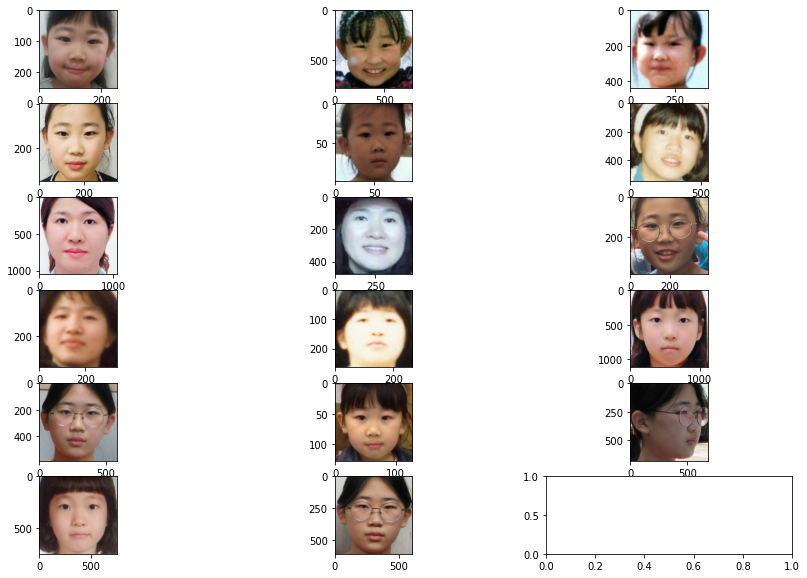

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15, 10))

for i in range(1, 19):
  img = mpimg.imread(df["identity"][i])
  plt.imshow(img)
  plt.subplot(6, 3, i)

print(len(df))

dict_score = {"F0003_D_14_Seoul": 0}
list_True = []
for id in df["identity"]:
  cd_family = id.split("/")[-1].split("_")[0]
  cd_personal = id.split("/")[-1].split("_")[1]
  cd_age = id.split("/")[-1].split("_")[2]
  cd_city = id.split("/")[-1].split("_")[3]
  cd_code = id.split("/")[-1].split("_")[4]

  id_img = cd_family + "_" + cd_personal + "_" + cd_age + "_" + cd_city
  list_True.append(id_img+"_"+cd_code)
  print(id_img)

  if id_img in dict_score:
    dict_score[id_img] += 1
  else:
    dict_score[id_img] = 1

print(dict_score)

In [28]:
import os

target_name = 'F0003_D_14_Seoul'

path = '/content/drive/MyDrive/Colab Notebooks/vision_project/faceID/only_face/'
total_data = os.listdir(path)
data_list = []

for i in total_data:
  
  cd_family = i.split("_")[0]
  cd_personal = i.split("_")[1]
  cd_age = i.split("_")[2]
  cd_city = i.split("_")[-2]
  cd_code = i.split("_")[-1]
  

  id_img = cd_family + "_" + cd_personal + "_" + cd_age + "_" + cd_city + "_" + cd_code

  data_list.append(id_img)
    

TP = dict_score['F0003_D_14_Seoul']  # True 로 분류한 것 중 실제 True인 경우
FP = len(df) - TP                    # True 로 분류한 것 중 실제 False인 경우

FN = 0;                              # False로 분류한 것 중 실제 True인 경우
TN = 0;                              # False로 분류한 것 중 실제 False인 경우


list_False = list(set(data_list) - set(list_True))  # False로 분류한 데이터 

for k in list_False:
  cd_family = k.split("_")[0]
  cd_personal = k.split("_")[1]
  cd_age = k.split("_")[2]
  cd_city = k.split("_")[-2]
  id_img = cd_family + "_" + cd_personal + "_" + cd_age + "_" + cd_city


  if id_img == target_name:
    FN +=1
  else:
    TN +=1

print("TP: %d FP: %d \nFN: %d TN: %d " %(TP,FP,FN,TN))

Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Accuracy = (TP + TN) / (TP + FN + FP + TN)

print("Precision : %f Recall : %f Accuracy :%f "%(Precision,Recall,Accuracy))

TP: 16 FP: 25 
FN: 6 TN: 74 
Precision : 0.390244 Recall : 0.727273 Accuracy :0.743802 
